## Basic charts in ggplot

__import libraries__
- install ggplot in terminal

`conda install -c conda-forge ggplot`

In [1]:
from ggplot import *
import pandas as pd
import numpy as np

%matplotlib inline

C:\Users\Augustine\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Augustine\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Augustine\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# take a look at the diamonds data set
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


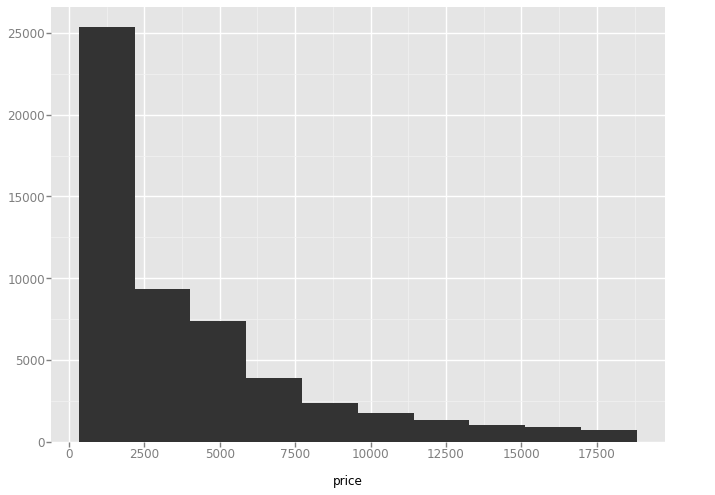

<ggplot: (109832735857)>

In [5]:
# let's build a quick plot (qplot)
qplot(x='price', data=diamonds)

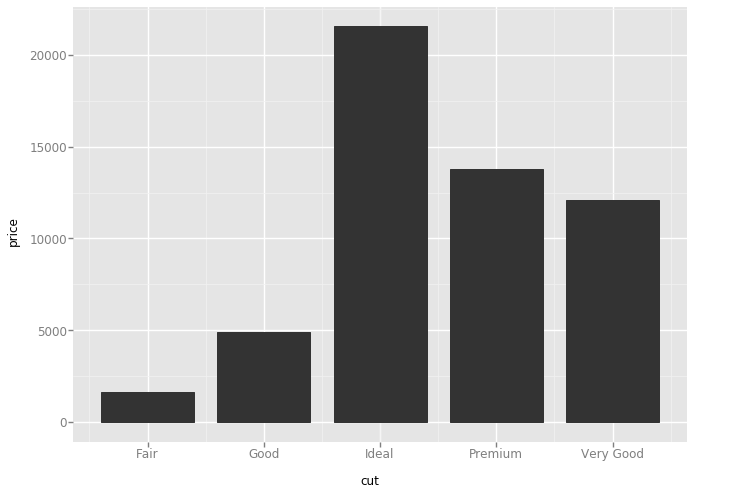

<ggplot: (109832735794)>

In [6]:
qplot(x='cut', y='price', data=diamonds, geom='bar')

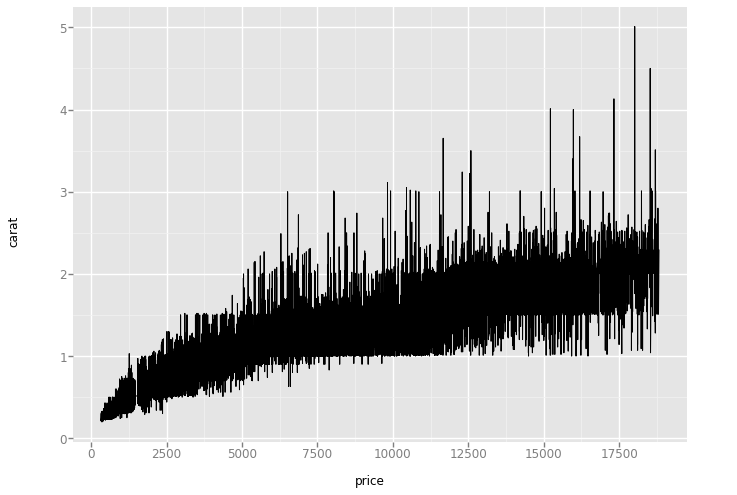

<ggplot: (109833383102)>

In [7]:
qplot(x='price', y='carat', data=diamonds, geom='line')

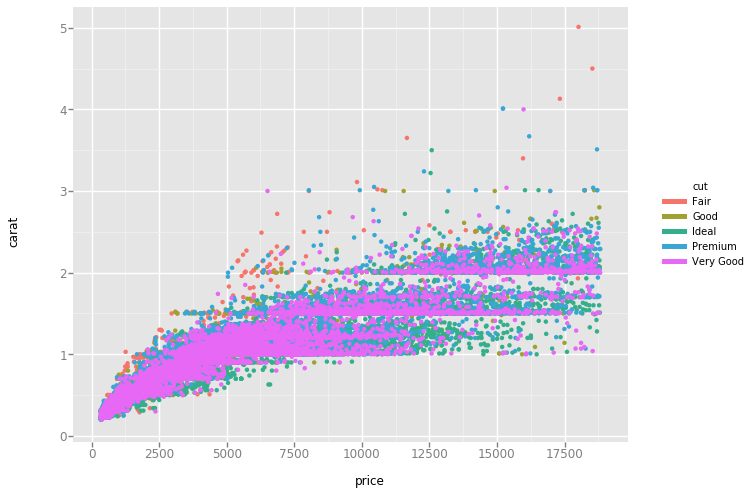

<ggplot: (-9223371927021019339)>

In [8]:
qplot(x='price', y='carat', data=diamonds, geom='jitter', color='cut')

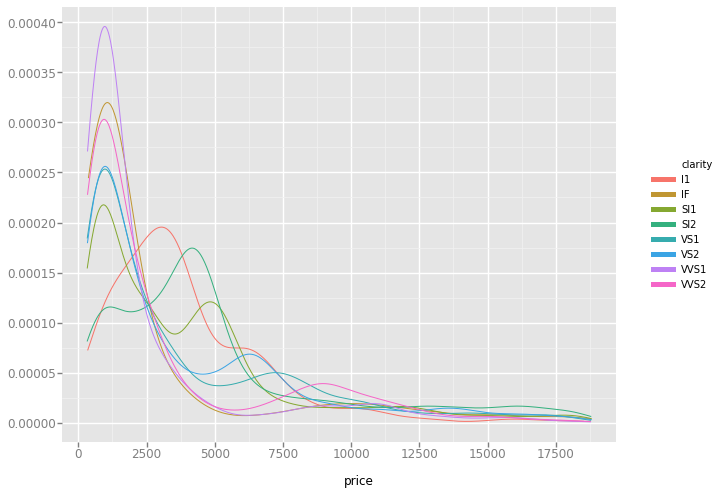

<ggplot: (-9223371927020444058)>

In [9]:
# create a separate line for each clarity
ggplot(diamonds, aes(x='price', color='clarity')) + \
    geom_density()

## Small multiples with gglot

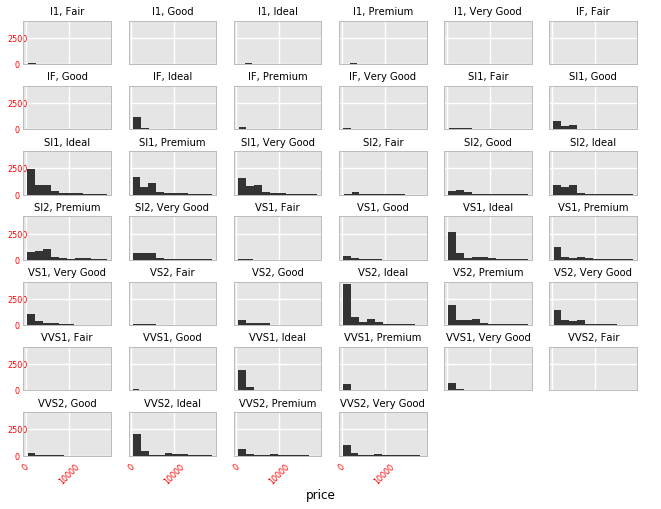

<ggplot: (-9223371927020510264)>

In [10]:
# create a Facets (trellis) for our chart
qplot(x='price', data=diamonds) + facet_wrap(x='clarity', y='cut')  + \
  theme(axis_text=element_text(size=8, color='red'), x_axis_text=element_text(angle=45))     

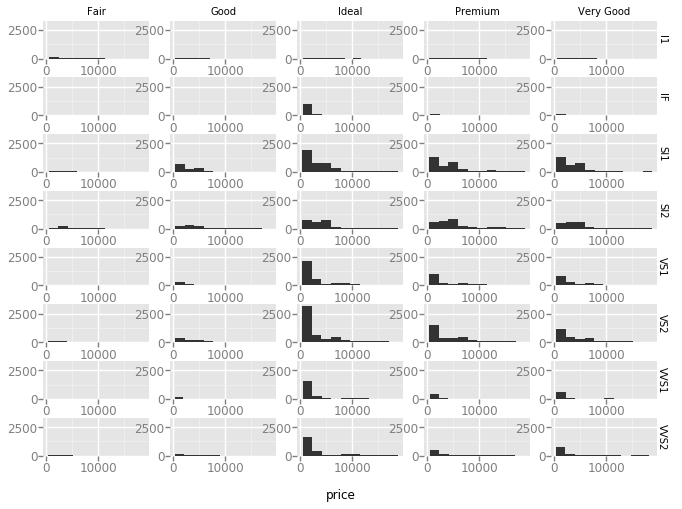

<ggplot: (-9223371927020508156)>

In [11]:
# let's organize these better into a grid
qplot(x='price', data=diamonds) + facet_grid(x='clarity', y='cut')

In [12]:
# let's look at Anscombe's Quartet
aq = pd.read_csv('anscombes-quartet-hier.csv', header=[0,1], index_col=[0])
aq

group     I           II         III           IV       
var       x      y     x     y     x      y     x      y
0      10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1       8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2      13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3       9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4      11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5      14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6       6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7       4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8      12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9       7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10      5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [13]:
aq.mean()

group  var
I      x      9.000000
       y      7.500909
II     x      9.000000
       y      7.500909
III    x      9.000000
       y      7.500000
IV     x      9.000000
       y      7.500909
dtype: float64

In [14]:
aq.var()

group  var
I      x      11.000000
       y       4.127269
II     x      11.000000
       y       4.127629
III    x      11.000000
       y       4.122620
IV     x      11.000000
       y       4.123249
dtype: float64

In [15]:
df = pd.read_csv('anscombes-quartet.csv', header=0, index_col=0)

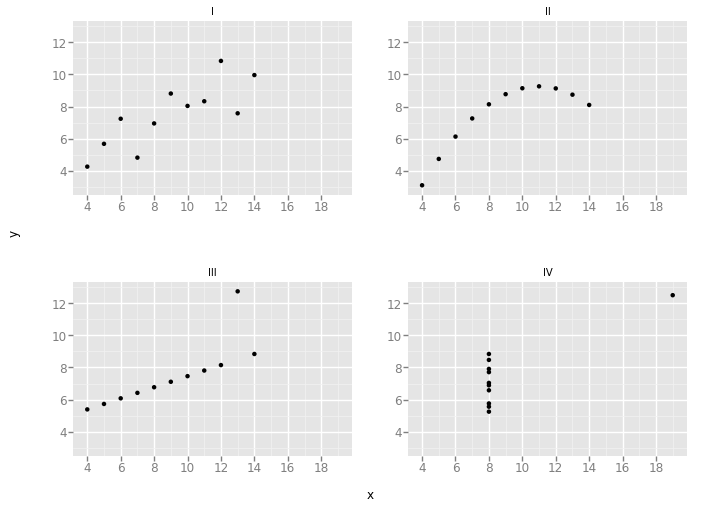

<ggplot: (109844107640)>

In [16]:
ggplot(aes(x='x', y='y'), data=df) + geom_point() + facet_wrap('group')

## Styling plots in ggplot

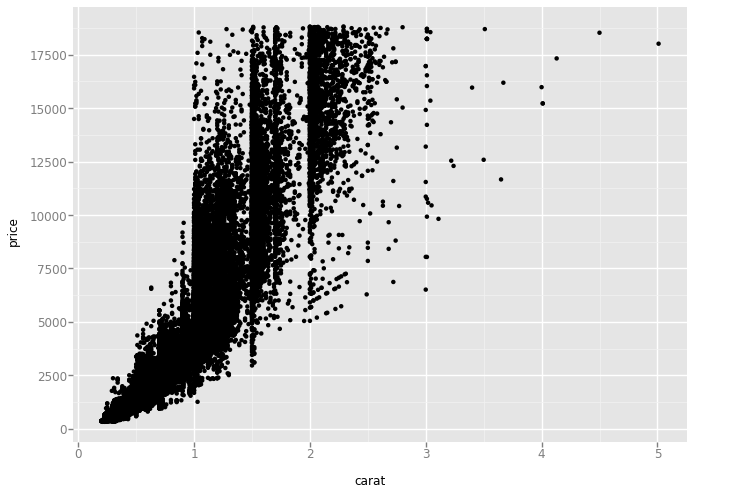

<ggplot: (-9223371927010907034)>

In [17]:
# let's start with a scatterplot
ggplot(aes(x='carat', y='price'), data=diamonds) + geom_point()

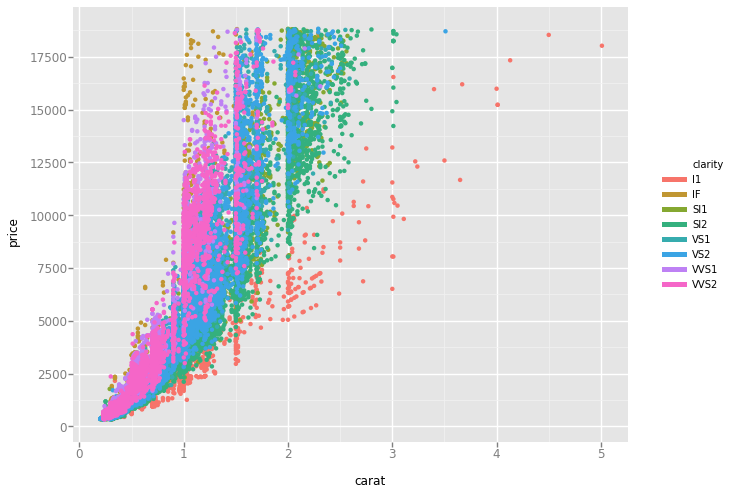

<ggplot: (109844097235)>

In [18]:
# now let's add a color
ggplot(aes(x='carat', y='price', color='clarity'), data=diamonds) + geom_point()

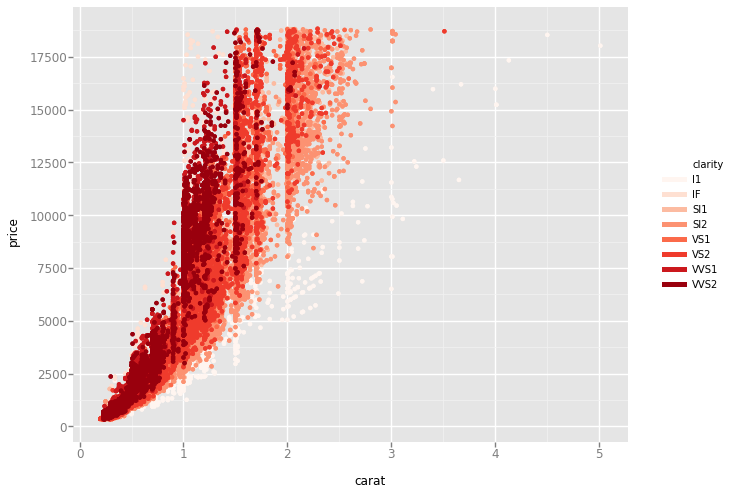

<ggplot: (109842496709)>

In [19]:
# Use color brewer for better options
# Start with a sequential color range
ggplot(aes(x='carat', y='price', color='clarity'), data=diamonds) + geom_point() +\
    geom_point() +\
    scale_color_brewer(type='seq', palette='Reds')

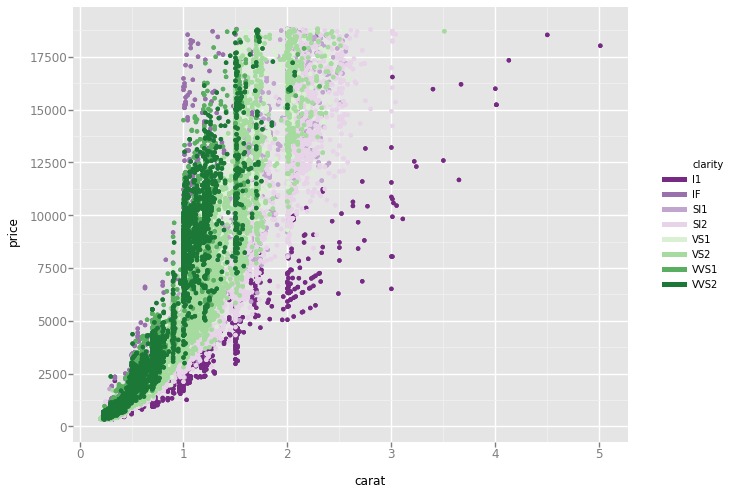

<ggplot: (109843991416)>

In [20]:
ggplot(aes(x='carat', y='price', color='clarity'), data=diamonds) + geom_point() +\
    geom_point() +\
    scale_color_brewer(type='div', palette=2)

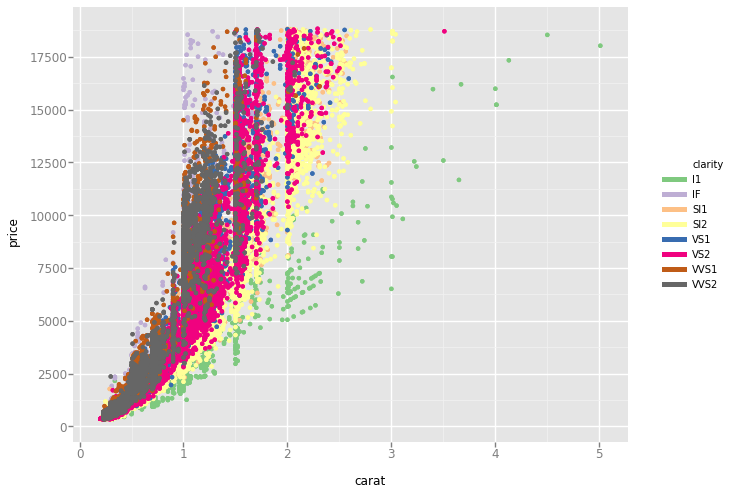

<ggplot: (-9223371927010409535)>

In [21]:
ggplot(aes(x='carat', y='price', color='clarity'), data=diamonds) + geom_point() +\
    geom_point() +\
    scale_color_brewer(type='qual')

## Finish your plots

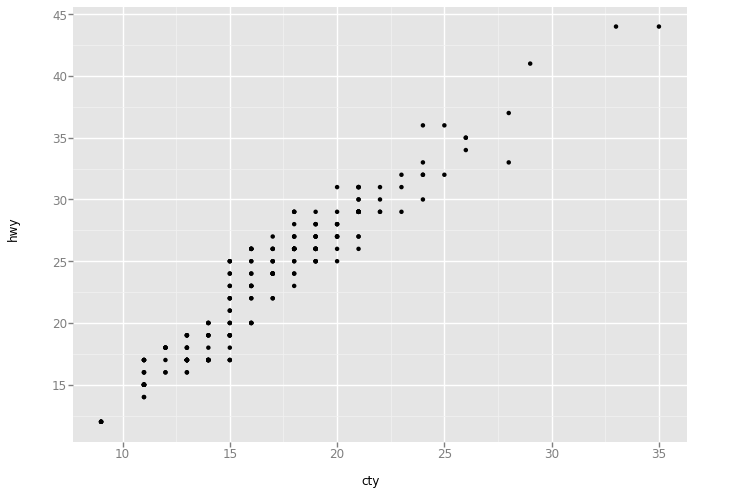

<ggplot: (-9223371927013469173)>

In [22]:
# let's start with a scatterplot
ggplot(mpg, aes(x='cty', y='hwy')) + geom_point()

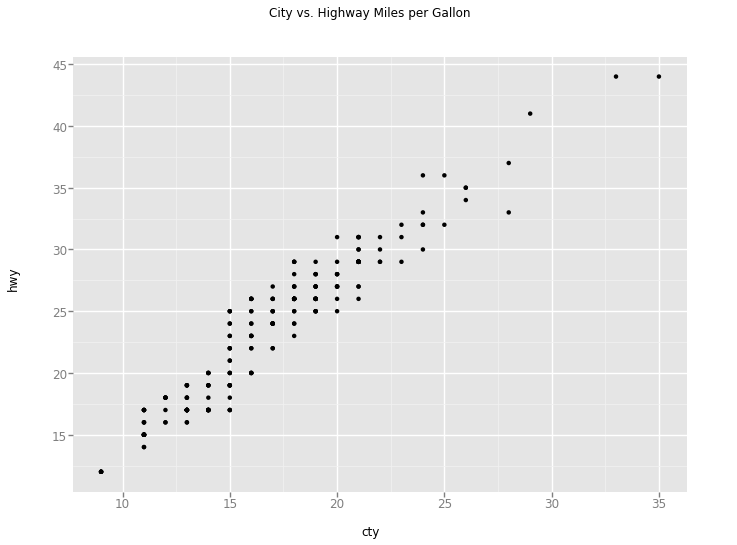

<ggplot: (109845482809)>

In [23]:
# let's add a title
ggplot(mpg, aes(x='cty', y='hwy')) + geom_point() +\
    ggtitle('City vs. Highway Miles per Gallon') 

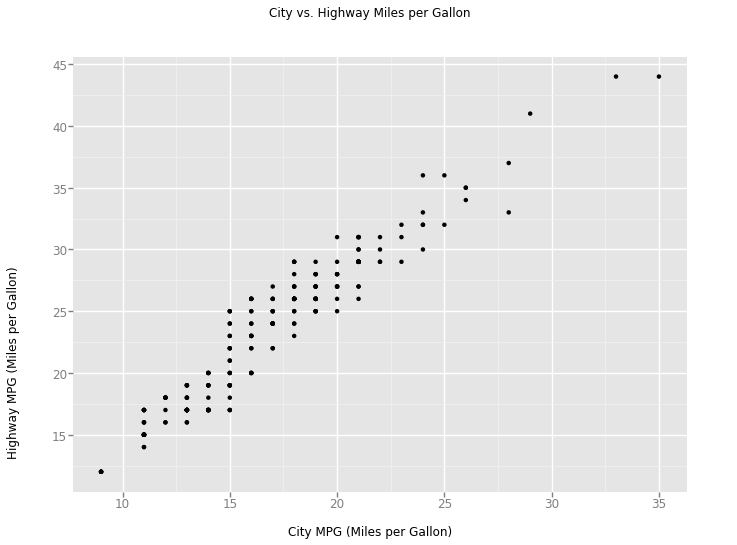

<ggplot: (109844694059)>

In [24]:
# let's add some custom labels
ggplot(mpg, aes(x='cty', y='hwy')) + geom_point() +\
    ggtitle('City vs. Highway Miles per Gallon') +\
    xlab('City MPG (Miles per Gallon)') +\
    ylab('Highway MPG (Miles per Gallon)')

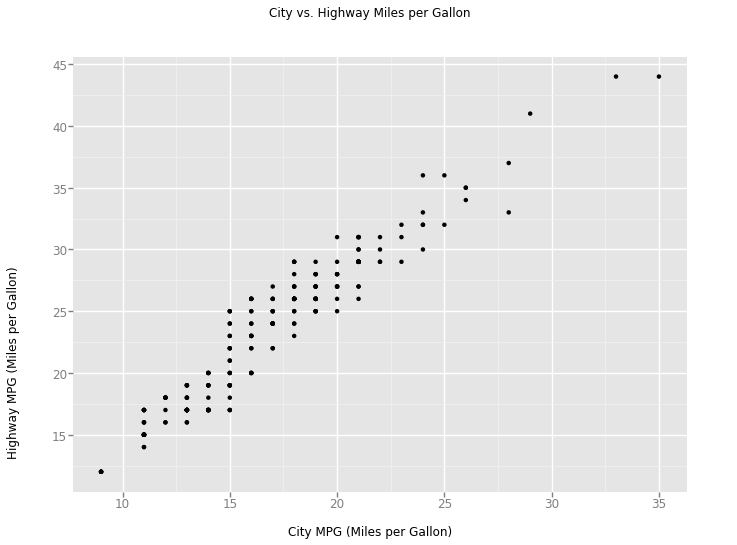

<ggplot: (109844732378)>

In [25]:
# Color might help here
ggplot(mpg, aes(x='cty', y='hwy')) +\
    geom_point() +\
    ggtitle('City vs. Highway Miles per Gallon') +\
    xlab('City MPG (Miles per Gallon)') +\
    ylab('Highway MPG (Miles per Gallon)') +\
    scale_color_brewer(type='qual')

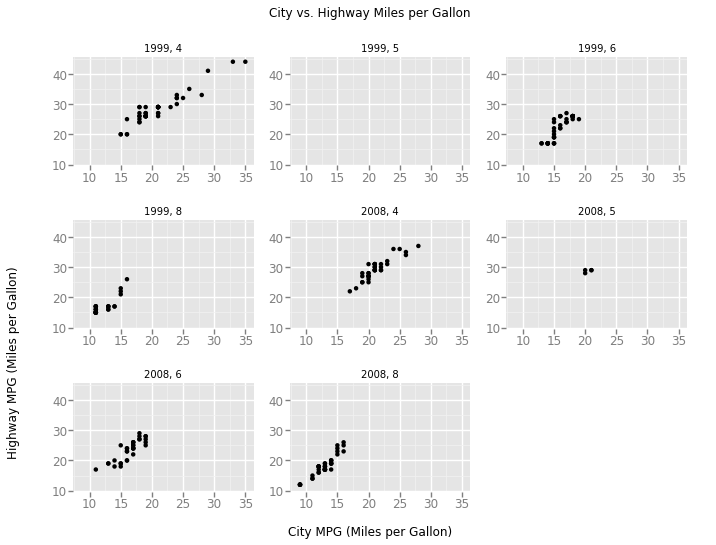

<ggplot: (109846594389)>

In [26]:
# how about splitting these out?
ggplot(mpg, aes(x='cty', y='hwy')) +\
    geom_point() +\
    ggtitle('City vs. Highway Miles per Gallon') +\
    xlab('City MPG (Miles per Gallon)') +\
    ylab('Highway MPG (Miles per Gallon)') +\
    scale_color_brewer(type='qual') +\
    facet_wrap(x='year', y='cyl')